In [31]:


import pandas as pd
import numpy as np
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import shap
# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import GaussianNB

#read excel file from a directory

path = '/content/drive/MyDrive/1-bez'

csv_files = glob.glob(os.path.join(path, "*.csv"))

In [14]:
path

'/content/drive/MyDrive/1-bez'

# New section

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:

df= pd.DataFrame()
for i in (csv_files):
    data = pd.read_csv(i)
    df = df.append(data, ignore_index=True)

date = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['date'] = date

cols = list(df)
cols = [cols[-1]]  + cols[0:len(cols)-1]
df = df[cols]
# number of NANs for all the data
df.head()
df.isnull().sum(axis=0).sort_values(ascending = False)
df.describe()


No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

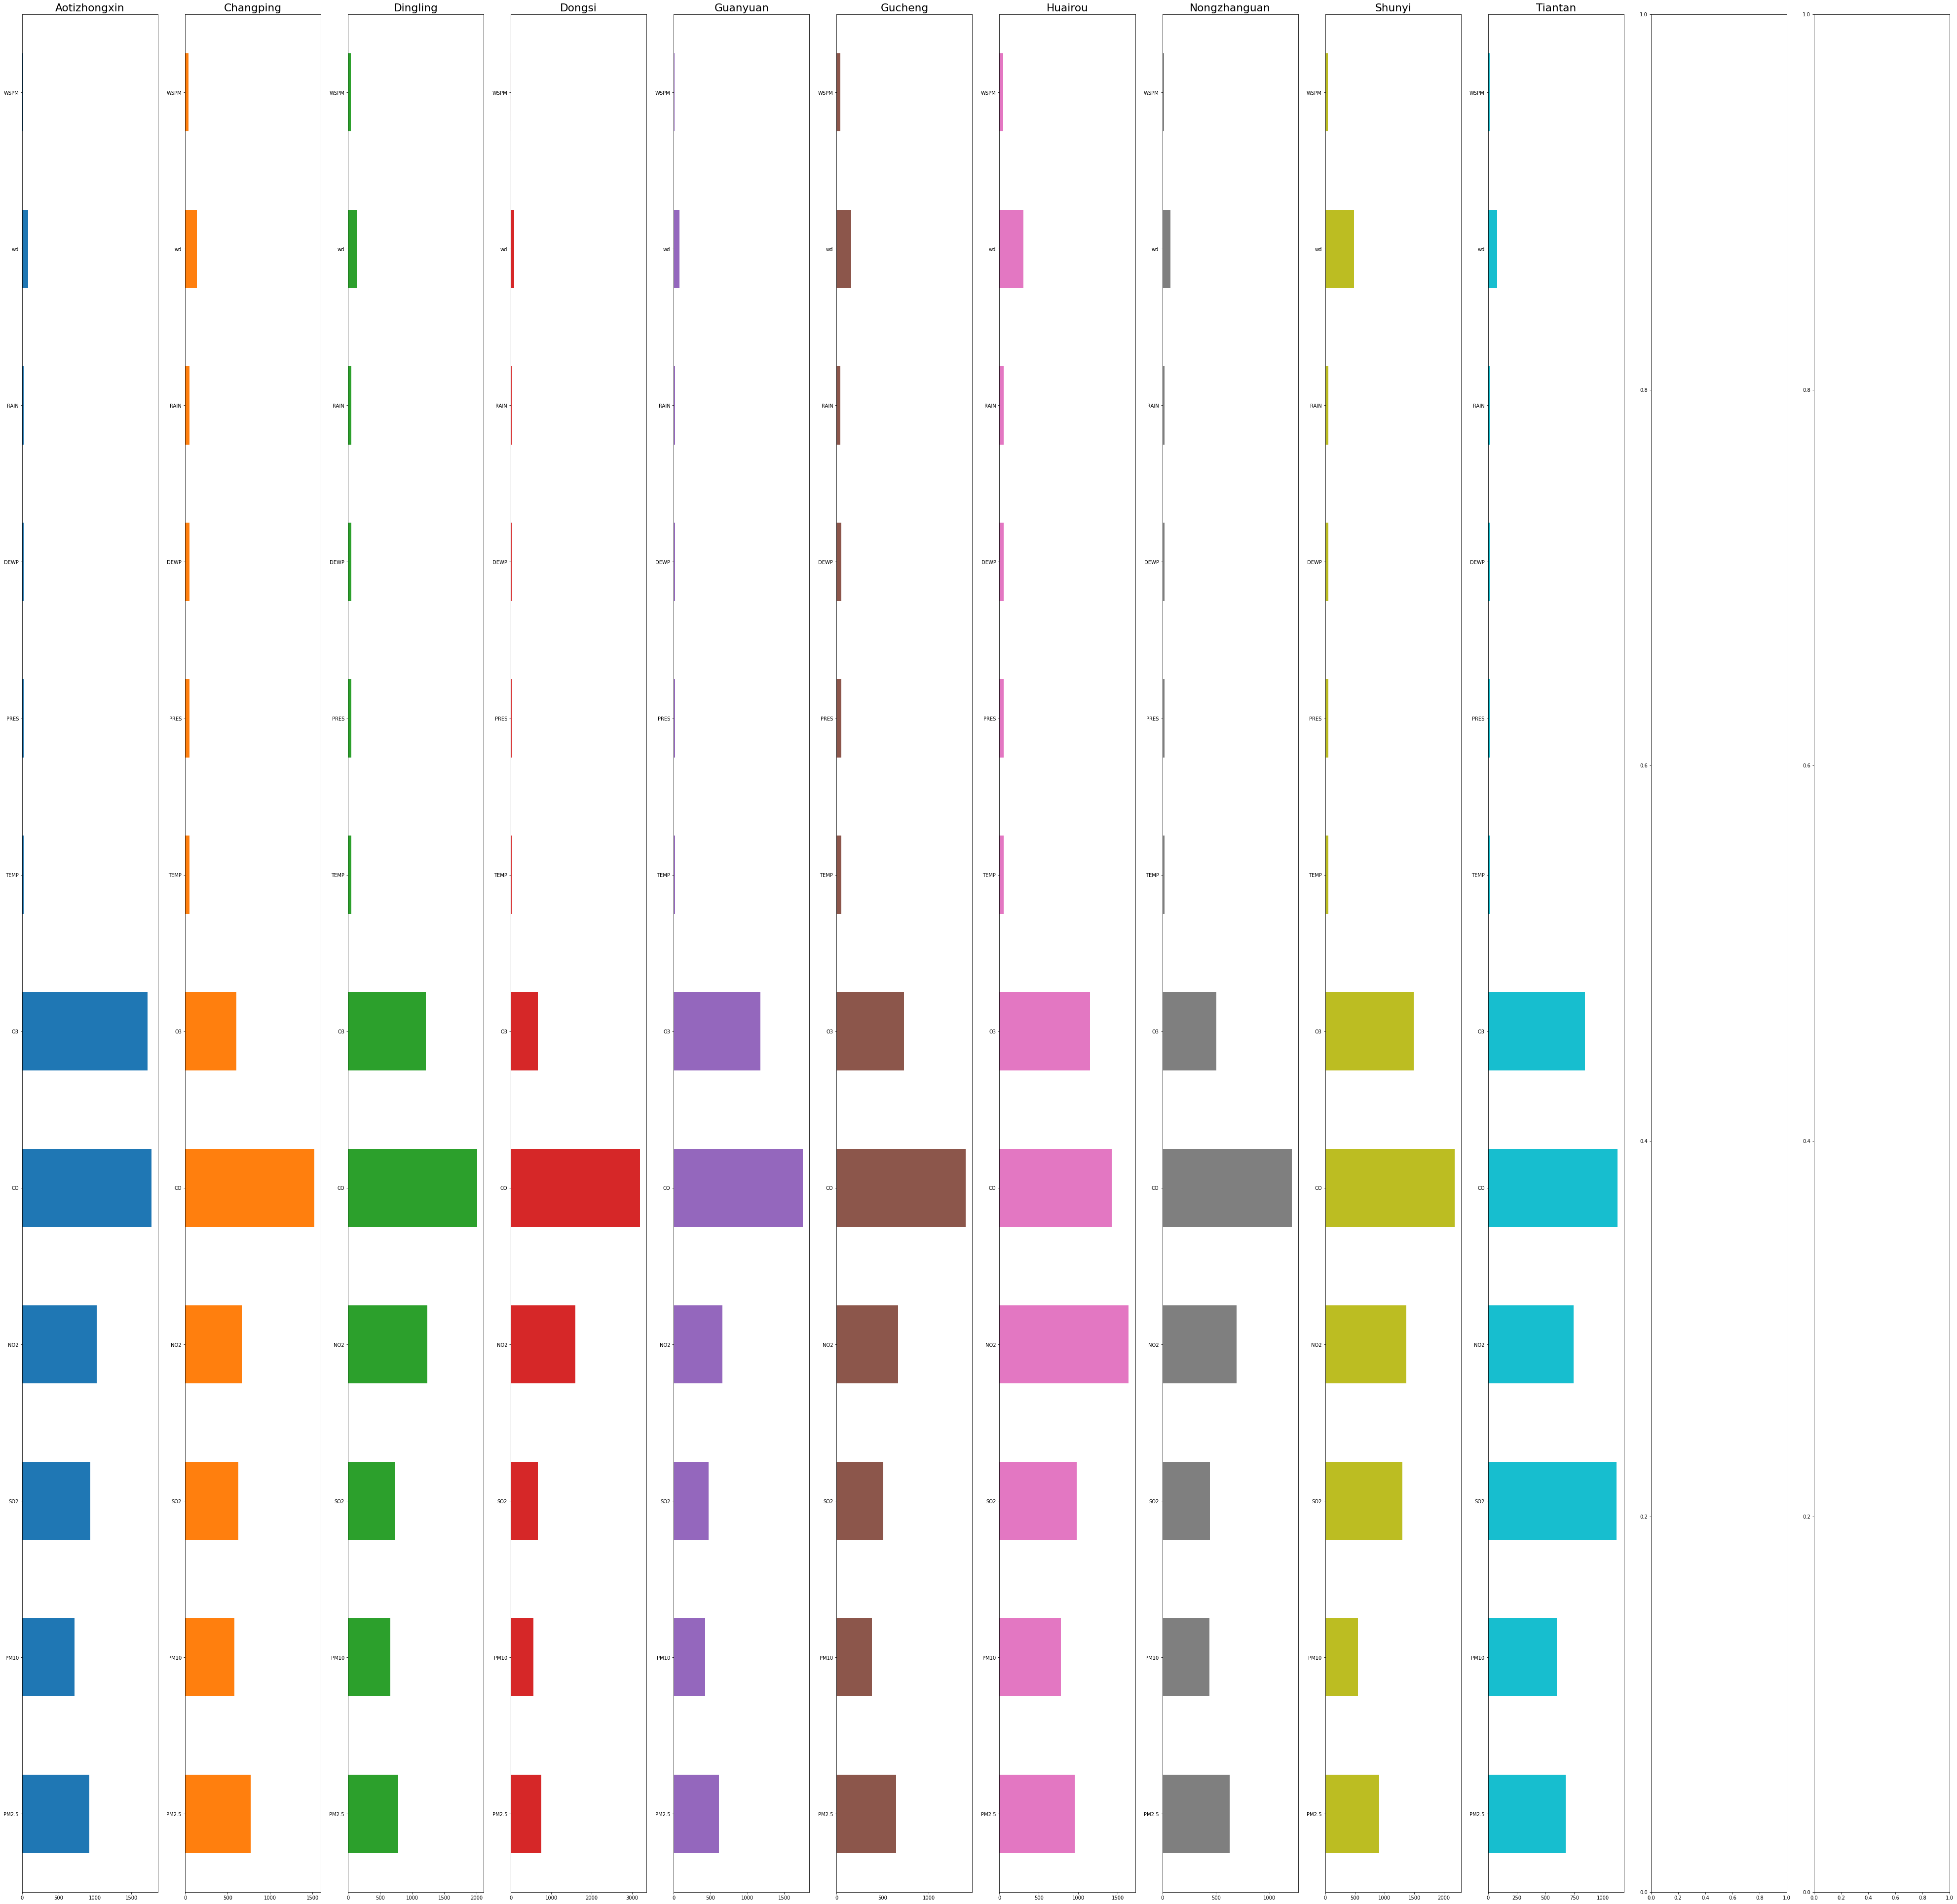

In [17]:

# plot number of NaNs for each city

df_station = df.groupby('station')

station_name = list(df_station.groups)


fig, axs = plt.subplots(nrows=1, ncols=len(station_name), figsize=(70,70))
prop_iter = iter(plt.rcParams['axes.prop_cycle'])
plt.rcParams.update({'font.size': 18})
for l,ax, m in zip(range(len(station_name)),axs, station_name):
   
   df_station.get_group(m).isnull().sum(axis=0).loc[~(df_station.get_group(m).isnull().sum(axis=0)==0)].plot(kind='barh', ax =ax, title= m, color=next(prop_iter)['color'])
   
   
plt.show()

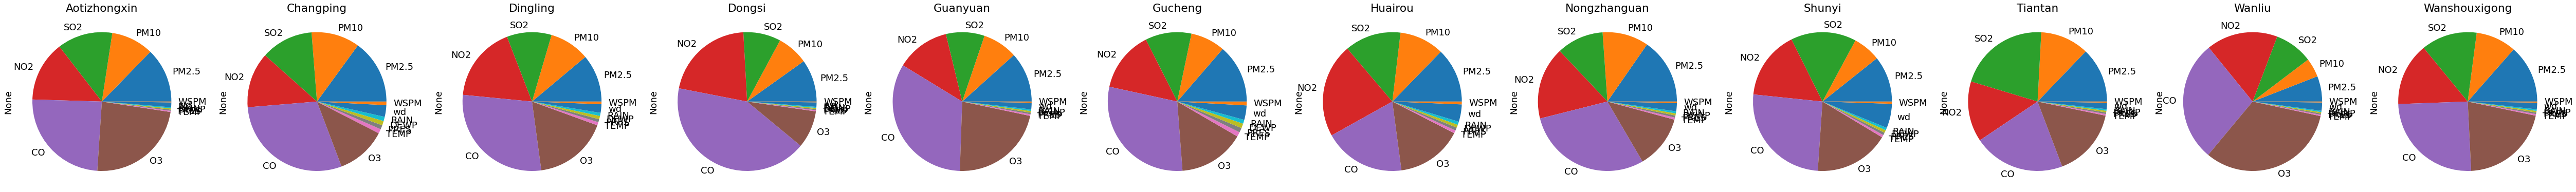

date  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
0 2013-03-01 00:00:00    3.0   6.0  3.0   8.0  300.0  44.0  -0.9  1025.8   
1 2013-03-01 01:00:00   12.0  12.0  3.0   7.0  300.0  47.0  -1.1  1026.1   
5 2013-03-01 05:00:00   11.0  11.0  3.0   7.0  200.0  45.0  -2.8  1028.2   
6 2013-03-01 06:00:00   12.0  12.0  3.0   9.0  300.0  74.0  -4.0  1029.0   
7 2013-03-01 07:00:00   13.0  13.0  3.0  23.0  300.0  59.0  -2.4  1030.5   

   DEWP  RAIN   wd  WSPM station  
0 -20.5   0.0   NW   9.3  Shunyi  
1 -21.3   0.0   NW   9.4  Shunyi  
5 -22.1   0.0  NNW   1.7  Shunyi  
6 -21.2   0.0  NNE   1.6  Shunyi  
7 -21.3   0.0   NE   1.7  Shunyi

In [18]:

fig, axs = plt.subplots(nrows=1, ncols=len(station_name), figsize=(70,70))
prop_iter = iter(plt.rcParams['axes.prop_cycle'])
plt.rcParams.update({'font.size': 18})
for l,ax, m in zip(range(len(station_name)),axs, station_name):
   df_station.get_group(m).isnull().sum(axis=0).loc[~(df_station.get_group(m).isnull().sum(axis=0)==0)].plot(kind='pie', ax =ax, title= m)
  
plt.tight_layout()
plt.show()

#Remove NaNs

df.dropna(inplace = True)

df.isnull().sum(axis=0)

df_d1 = df.drop(['No','month', 'year' , 'hour','day'],  axis =1)

df_d1.head()

            No     year    month      day     hour    PM2.5     PM10      SO2  \
count  31815.0  31815.0  31815.0  31815.0  31815.0  31815.0  31815.0  31815.0   
mean   17899.0   2015.0      6.0     16.0     12.0     82.0    109.0     17.0   
std    10058.0      1.0      3.0      9.0      7.0     80.0     94.0     23.0   
min        1.0   2013.0      1.0      1.0      0.0      3.0      2.0      1.0   
25%     9416.0   2014.0      3.0      8.0      6.0     22.0     37.0      3.0   
50%    18093.0   2015.0      6.0     15.0     12.0     58.0     86.0      8.0   
75%    26590.0   2016.0      9.0     23.0     18.0    114.0    154.0     21.0   
max    35064.0   2017.0     12.0     31.0     23.0    713.0    948.0    229.0   

           NO2       CO       O3     TEMP     PRES     DEWP     RAIN     WSPM  
count  31815.0  31815.0  31815.0  31815.0  31815.0  31815.0  31815.0  31815.0  
mean      59.0   1257.0     56.0     14.0   1012.0      3.0      0.0      2.0  
std       37.0   1223.0     58

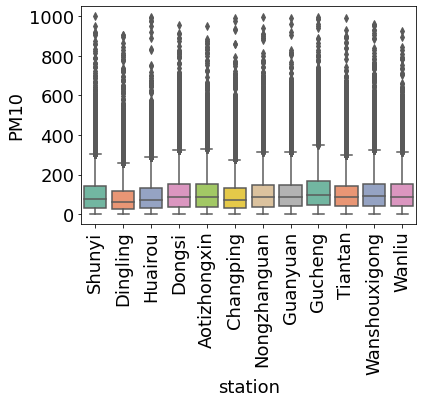

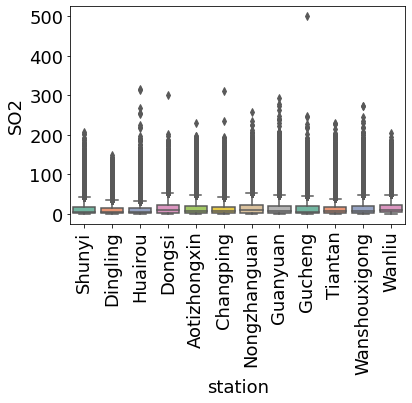

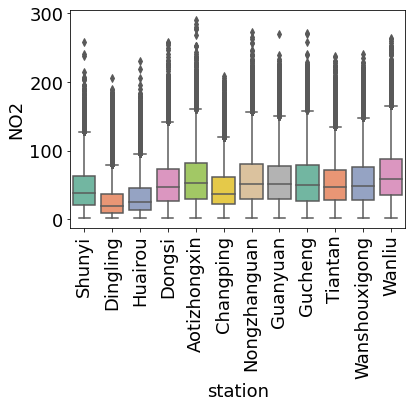

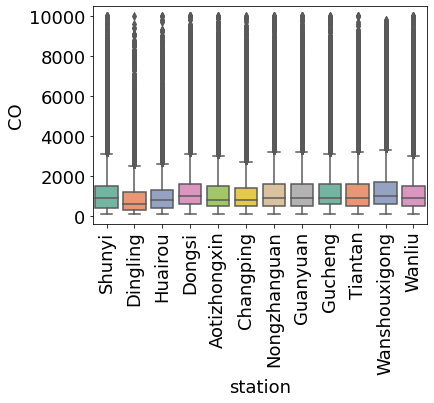

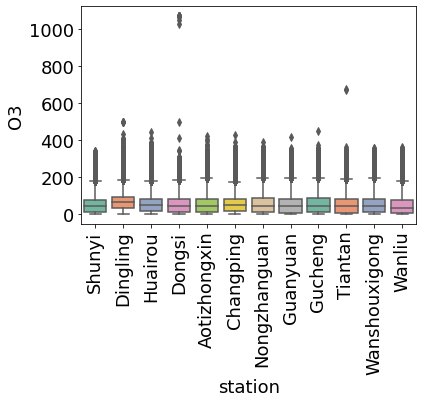

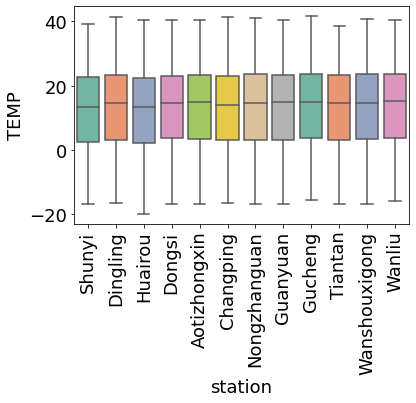

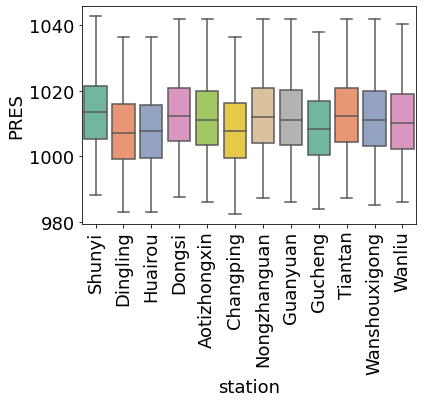

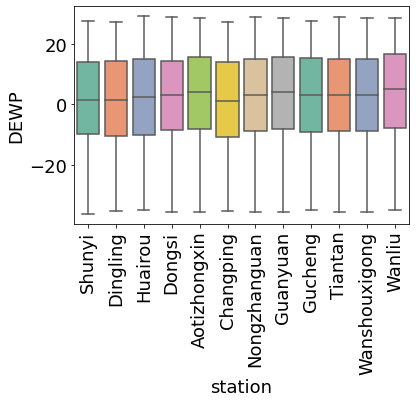

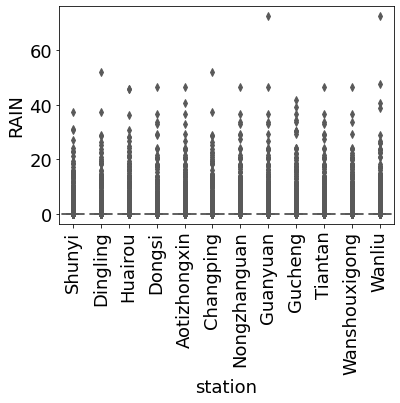

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [19]:


# Stats
#fig, axs = plt.subplots(nrows=3, ncols=len(station_name), figsize=(70,70))

df_station = df.groupby('station')
station_name = list(df_station.groups)

for i in range(0, len(station_name)):
    
    Table_stat = df_station.get_group(station_name[i]).describe().apply(round)
    print(Table_stat , station_name[i])
               
  
#plot boxplot  for each variable  vs station



for i in list(df_d1)[2:-2]:
    plt.figure()
    gg = sns.boxplot(y = i, x = 'station', data = df_d1, palette="Set2")
    gg.set_xticklabels(gg.get_xticklabels(), rotation=90)
    plt.show()


In [20]:
#plot boxplot and distribution plot based on two variables for each site
def plot_boxplot_distribution(x1, y1, station_name_num):
   df_station_group=df_d1.groupby('station')
   station_name = list(df_station_group.groups)[station_name_num]
   g = sns.boxplot(y=y1, x =x1 , data = df_station_group.get_group(station_name))
   g.set_xticklabels(g.get_xticklabels(), rotation=45)
   g.set_title(station_name)
   sns.displot(data , x = y1 , hue = x1, multiple="stack",stat = "density",kde = False).set(title =station_name)

#plot all variables in one plot for each station

def plot_line(station_name_num):
    df_station_group=df_d1.groupby('station')
    station_name = list(df_station_group.groups)[station_name_num]
    df_r = (df_station_group.get_group((station_name))).drop(columns =['date','station', 'wd'])
    fig, axs = plt.subplots(nrows = df_r.shape[1],ncols=1, figsize=(10,100))
    for i, group in zip(range(0,df_r.shape[1]),list(df_r)):
        plt.suptitle(station_name, x= 0.5, y =1.01, fontsize = 30)
        axs[i].plot(df_r[group])
        axs[i].set_title(group, fontsize=10)
        fig.tight_layout()
        fig.subplots_adjust(hspace=.8)
        plt.xticks(rotation = 90)

In [21]:
# detectOutliers

def detect_outlier(name_of_var, data):
    #Outlier_list=[]
    for i in list(name_of_var):
        IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
        Lower_outlier =data[i].quantile(0.25) - (IQR*3)
        Upper_outlier = data[i].quantile(0.75) + (IQR*3)
        print(f"{i} outliers are values < {round(Lower_outlier)} or > {round(Upper_outlier)}")
    return  round(Lower_outlier), round(Upper_outlier)
        




In [22]:
#Remove Outliers


def remove_outlier(name_of_var, data, Lower, Upper):
    Index_names = data[(data[name_of_var] > Upper) | (data[name_of_var] < Lower)].index
    data = data.drop(Index_names, inplace = True)
    return data



remove_outlier('PM2.5', df_d1, -253, 384)
remove_outlier('PM10', df_d1, -291, 472)
remove_outlier('SO2', df_d1, -48, 71)
remove_outlier('NO2', df_d1, -121, 215)
remove_outlier('CO', df_d1, -2500, 4500)
remove_outlier('O3', df_d1, -202, 295)
remove_outlier('TEMP', df_d1, -57, 84)
remove_outlier('PRES', df_d1, 952, 1069)
remove_outlier('DEWP', df_d1, -81, 87)
remove_outlier('WSPM', df_d1, -3, 6)










df_d1.drop(['RAIN'], axis =1,  inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


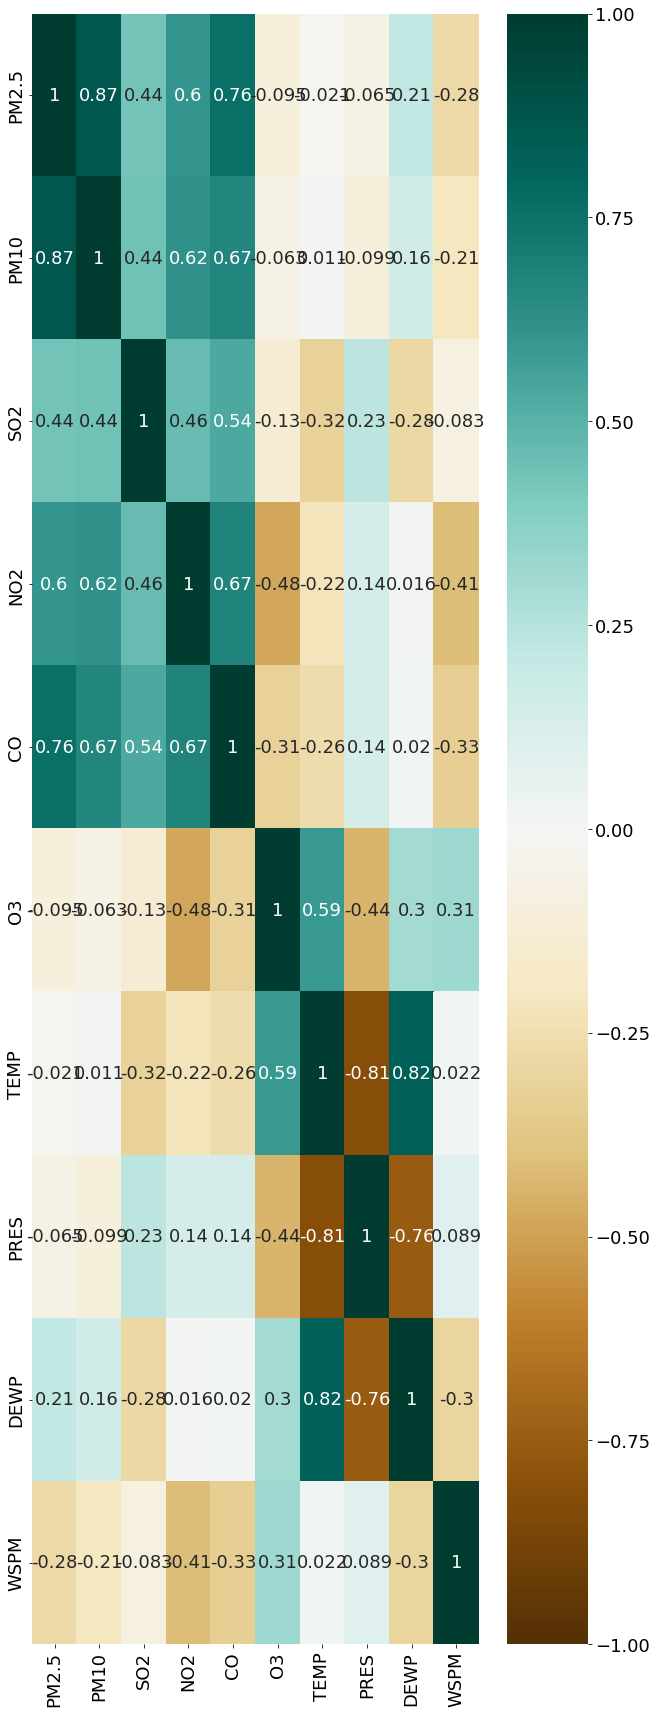

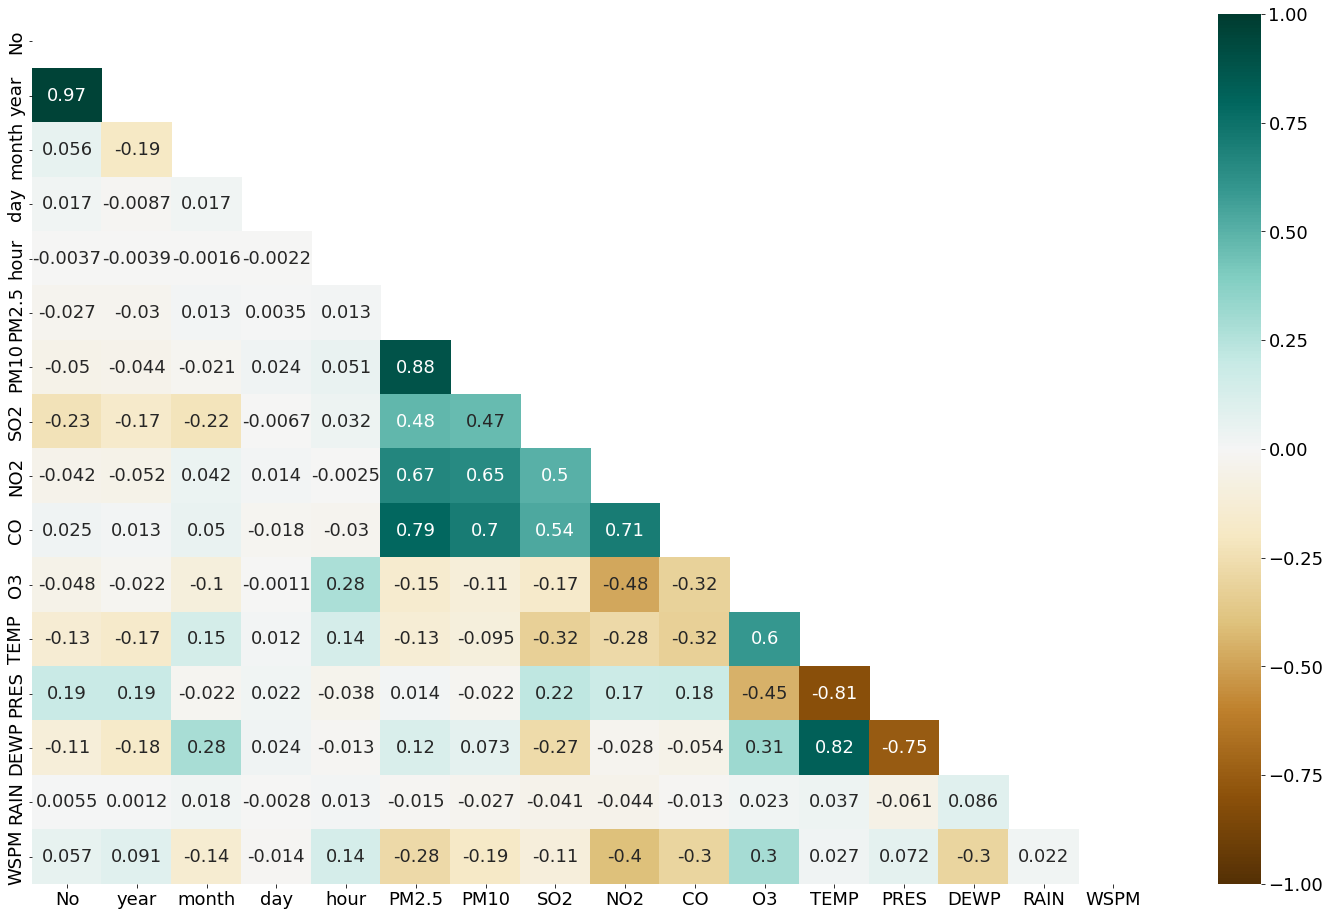

In [23]:
# Heatmap

plt.figure(figsize=(10, 30))
heatmap = sns.heatmap(df_d1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.figure(figsize=(25, 16))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


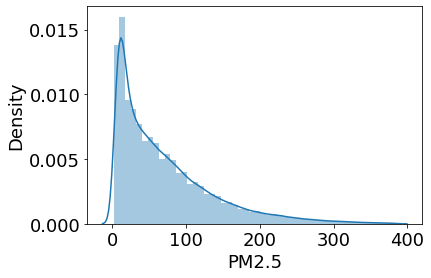

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


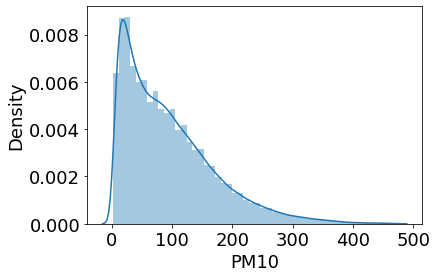

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


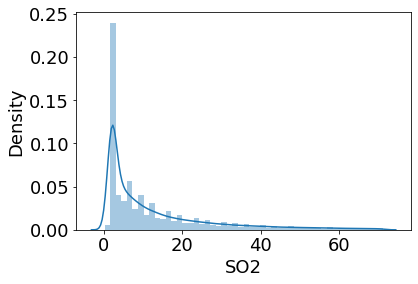

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


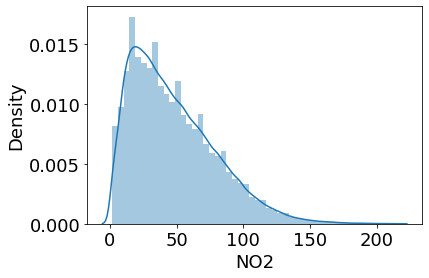

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


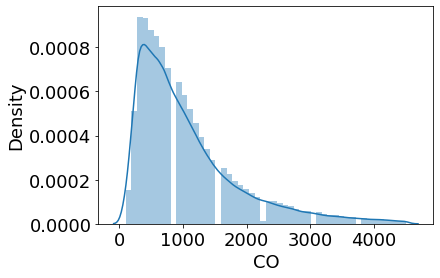

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


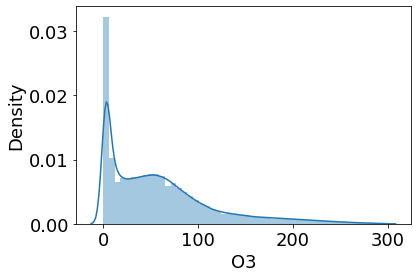

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


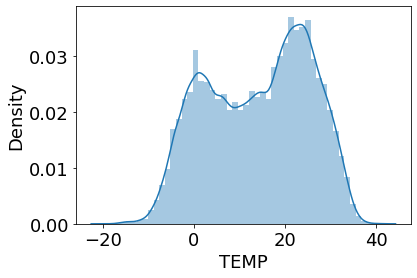

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


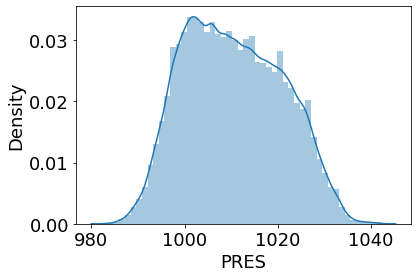

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


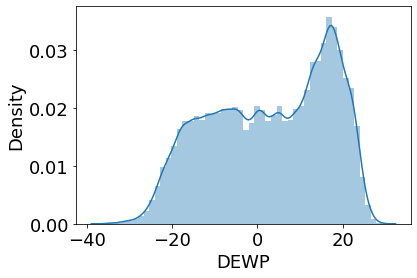

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


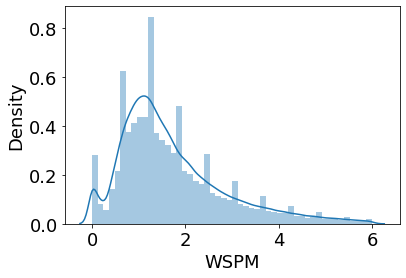

<Figure size 720x720 with 0 Axes>

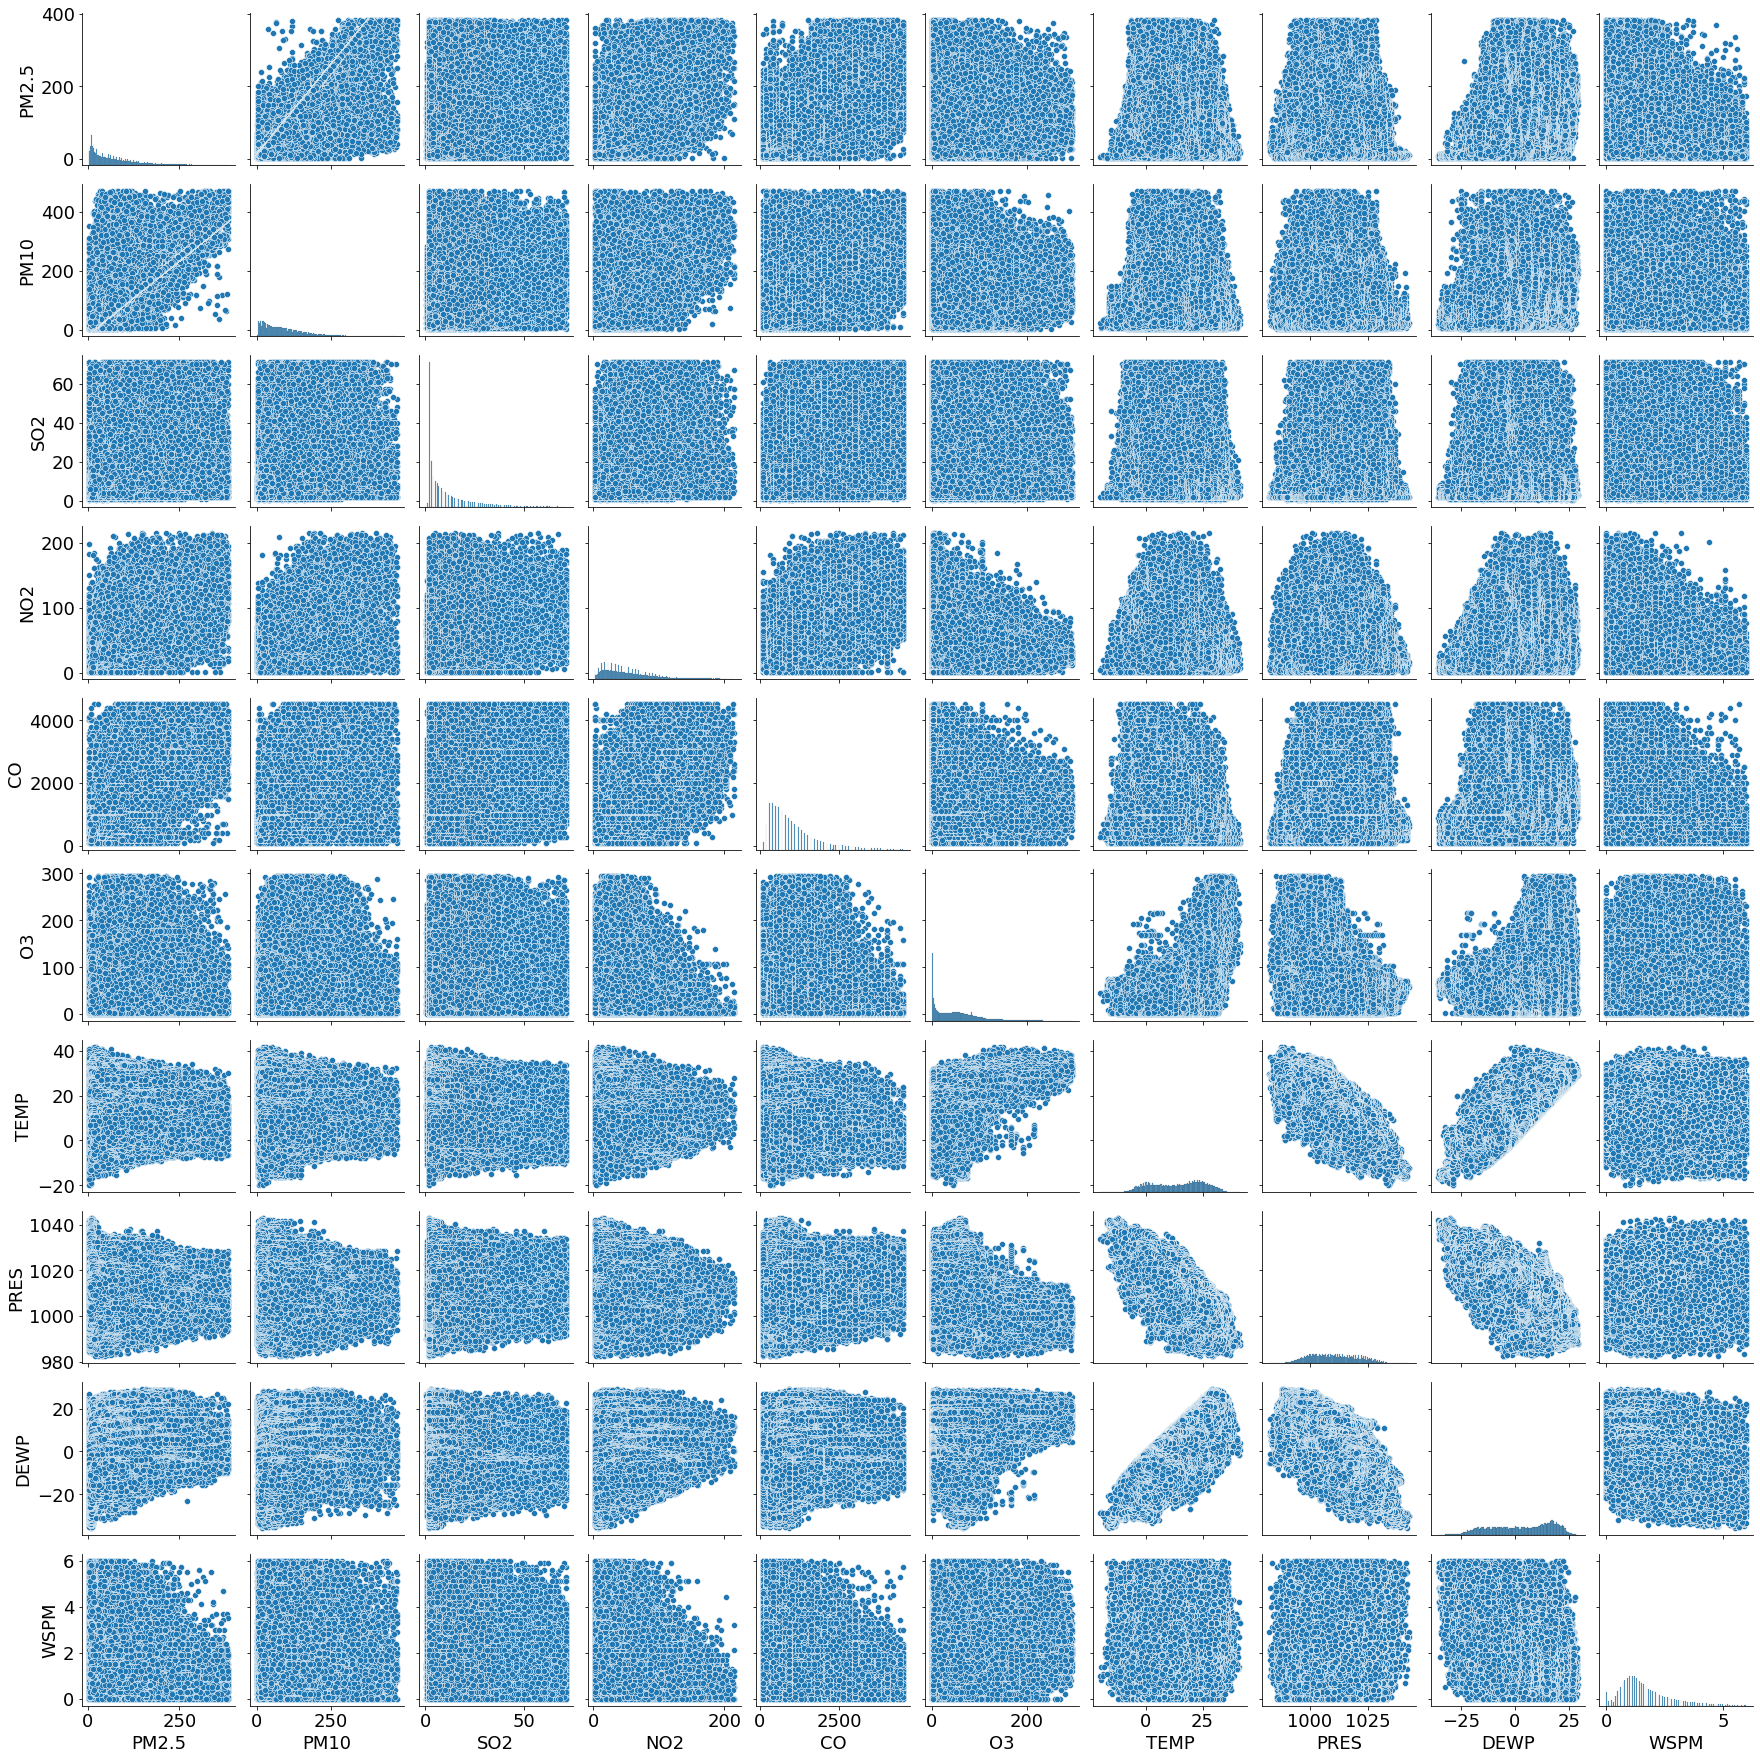

In [24]:
#Seperatin feautures

features = ['PM2.5','PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES','DEWP', 'WSPM']
Classes = ['station', 'wd']


df_d2 = df_d1.sort_values('date')
X = df_d2[features]
Y = df_d2[Classes]



for i in list(X):
        sns.distplot(X[i])
        plt.show()

plt.figure(figsize=(10,10))
sns.pairplot(data=X)
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


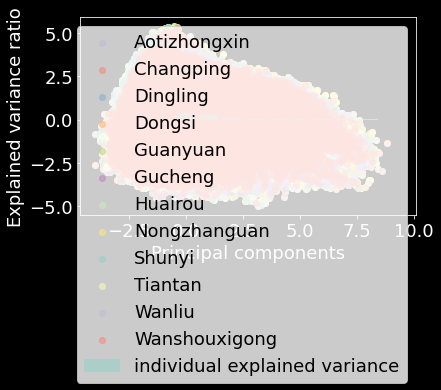

In [26]:

#data standardization

X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = list(X)
pca = PCA()
pca_f = pca.fit_transform(X_std)
pca.get_covariance()
explained_variance=pca.explained_variance_ratio_
explained_variance

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


scatter = plt.scatter(pca_f[:,0],pca_f[:,1])
y= Y['station']

for labels in np.unique(y):
    plt.scatter(pca_f [y==labels, 0], pca_f [y==labels, 1], label = labels,  alpha=0.5)
    
plt.legend()
plt.show()

In [ ]:

X_train = X_std.iloc[0:(round(0.8*len(X))),]

Y_train = Y.iloc[0:(round(0.8*len(X))),]

X_test = X_std.drop(X_train.index)
Y_test = Y.drop(Y_train.index)








#RandomForest
method_names = []
method_scores = []
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train,Y_train['station'])
print("Random Forest Classification Score: ",rand_forest.score(X_test,Y_test['station']))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(X_test,Y_test['station']))


sk
rand_forest.feature_importances_
plt.barh(list(X), rand_forest.feature_importances_)


explainer = shap.TreeExplainer(rand_forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")




X_train.shape[0]


#Confusion Matrix
Y_pred = rand_forest.predict(X_test)






from sklearn.metrics import multilabel_confusion_matrix
import sklearn.metrics as skm

Y_unique = np.unique(Y_test['station'])
mcm = multilabel_confusion_matrix(Y_test['station'], Y_pred, labels = Y_unique)



print(skm.classification_report(Y_test['station'],Y_pred))

conf_mat = confusion_matrix(Y_test['station'],Y_pred)


df_cm = pd.DataFrame(conf_mat, index =[np.unique(Y_pred)], columns=[np.unique(Y_pred)] )

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True) # font size

plt.show()





#  X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size=0.2, random_state=42)
#  X_train.head()
#  y_train.head()
# #






# plt.figure(figsize=(16, 6))
# df_station_group=df_d1.groupby('station')
# df_r = (df_station_group.get_group((station_name))).drop(columns =['station', 'wd'])
# heatmap = sns.heatmap(df_d1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# plt.figure(figsize=(16, 6))
# mask = np.triu(np.ones_like(df_d1.corr(), dtype=np.bool))
# heatmap = sns.heatmap(df_d1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')




#def Select_model_from_sklearn(cmf,Xtrain, Ytrain, Xtest, Ytest, seed, n_estimators, cv)



       
def Select_model_from_sklearn(clf,Xtrain, Ytrain, Xtest, Ytest):
    
     
       clf_cal = clf.fit(Xtrain , Ytrain)
       clf_score_cal =  clf_cal.score(Xtrain, Ytrain)
       print(f"{clf} score for training samples is {clf_score_cal}")
       clf_pred = clf_cal.predict(Xtest)
       clf_score_pred = clf_cal.score(Xtest, Ytest)
       print(f"{clf} score for test samples is {clf_score_pred}")
       print(skm.classification_report(Ytest,clf_pred))
      # clf_pred.feature_importances_
       plt.barh(list(Xtrain), clf_cal.feature_importances_)
       plt.xlabel(f"{clf} Importance")
       plt.show()
       
       #var = Select_model_from_sklearn
       
       
    #method_names.append("Random Forest")   
           




classifiers = [
   AdaBoostClassifier(),
   RandomForestClassifier(),
    GradientBoostingClassifier(),
    
]




for cmf in classifiers:
   Select_model_from_sklearn(cmf,X_train, Y_train['station'], X_test, Y_test['station'])
    
for i in list(df_d1[1:-3]):
    detect_outlier([i], df_d1)
